# 12.1 Interspecific variation

In [43]:
sp = {'557R': 'Minc',
 'HarA': 'Mare',
 'HarC': 'Minc',
 'MareL28': 'Mare',
 'MareL32': 'Mare',
 'MentL30': 'Ment',
 'Mflo': 'Mflo',
 'MfloFloSoum': 'Mflo',
 'MincA14': 'Minc',
 'MincL15': 'Mjav',
 'MincL17': 'Mjav',
 'MincL19': 'Minc',
 'MincL27': 'Minc',
 'MincL9': 'Minc',
 'MincVW6': 'Minc',
 'MjavL57': 'Mjav',
 'MjavVW4': 'Mjav',
 'MjavVW5': 'Mjav',
 'MlanHapSoum': 'Mhap'   }

In [44]:
import glob
from Bio import SeqIO

pat = "./mitochondrial_assemblies/phylogenetic_analysis/*_trimmed_aln.fasta"
dist_dict = {'Gene':[],'I':[],'II':[],'Identity':[], 'Comparison':[], 'Genome': [], 'Type':[]}
for f in glob.glob(pat):
    gene = f.split('/')[-1].split('@')[0]
    records = list(SeqIO.parse(f,'fasta'))
    records = sorted(records, key=lambda x: x.id)
    for i in range(len(records)):
        for j in range(i+1,len(records)):
            total = 0
            ident = 0
            for p in range(len(records[i])):
                pair = str(records[i].seq[p])+str(records[j].seq[p])
                if '-' in pair:
                    continue
                total += 1
                if pair[0] == pair[1]:
                    ident+=1
            dist_dict['Gene'].append(gene)
            dist_dict['I'].append(records[i].id)
            dist_dict['II'].append(records[j].id)
            dist_dict['Identity'].append(ident/float(total))
            dist_dict['Comparison'].append(' '.join(sorted([sp[records[i].id],sp[records[j].id]])))
            dist_dict['Genome'].append('mitochondrial')
            Type = '2between'
            if 'Ment' in dist_dict['Comparison'][-1] or 'Mhap' in dist_dict['Comparison'][-1]:
                Type = '3betweenOG'
            if len(set(dist_dict['Comparison'][-1].split(' '))) == 1:
                Type = '1within'
            dist_dict['Type'].append(Type)
    

In [45]:
import glob
from Bio import SeqIO

pat = "./orthofinder/all_inputs/Results_Jan16/I2_3X2_gt0.7_st0.001_alns_1_4/*.fasta"
for f in glob.glob(pat):
    gene = f.split('/')[-1].split('.')[0]
    records = list(SeqIO.parse(f,'fasta'))
    records = sorted(records, key=lambda x: x.id)
    for i in range(len(records)):
        for j in range(i+1,len(records)):
            id1, id2 = records[i].id, records[j].id
            if not id1[-1] == id2[-1]:
                continue
            if id1.split('_')[0] == id2.split('_')[0]:
                continue
            total = 0
            ident = 0
            for p in range(len(records[i])):
                pair = str(records[i].seq[p])+str(records[j].seq[p])
                if '-' in pair:
                    continue
                total += 1
                if pair[0] == pair[1]:
                    ident+=1
            if not total:
                continue
            dist_dict['Gene'].append(gene)
            dist_dict['I'].append(records[i].id[:-1])
            dist_dict['II'].append(records[j].id[:-1])
            dist_dict['Identity'].append(ident/float(total))
            dist_dict['Comparison'].append(' '.join(sorted([id1[:4],id2[:4]])))
            dist_dict['Genome'].append('nuclear')
            Type = '2between'
            if 'Ment' in dist_dict['Comparison'][-1] or 'Mhap' in dist_dict['Comparison'][-1]:
                Type = '3betweenOG'
            if len(set(dist_dict['Comparison'][-1].split(' '))) == 1:
                Type = '1within'
            dist_dict['Type'].append(Type)

In [46]:
import pandas as pd

df= pd.DataFrame.from_dict(dist_dict)
df

,Comparison,Gene,Genome,I,II,Identity,Type
0,Mare Minc,s-rRNA,mitochondrial,557R,HarA,0.991803,2between
1,Minc Minc,s-rRNA,mitochondrial,557R,HarC,1.000000,1within
2,Mare Minc,s-rRNA,mitochondrial,557R,MareL28,0.993443,2between
3,Mare Minc,s-rRNA,mitochondrial,557R,MareL32,0.993443,2between
4,Ment Minc,s-rRNA,mitochondrial,557R,MentL30,0.887974,3betweenOG
5,Mflo Minc,s-rRNA,mitochondrial,557R,Mflo,0.995082,2between
6,Mflo Minc,s-rRNA,mitochondrial,557R,MfloFloSoum,0.996721,2between
7,Minc Minc,s-rRNA,mitochondrial,557R,MincA14,1.000000,1within
8,Minc Mjav,s-rRNA,mitochondrial,557R,MincL15,0.995082,2between
9,Minc Mjav,s-rRNA,mitochondrial,557R,MincL17,0.995082,2between


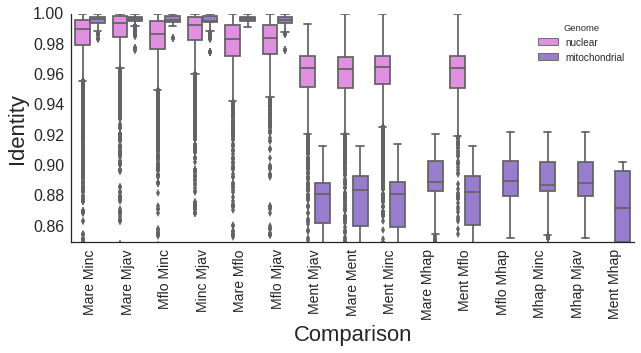

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline
fig, ax = plt.subplots(figsize=(9,5), dpi=1000)

g = sns.boxplot(x = 'Comparison', y='Identity',
                palette=['Violet','MediumPurple'],
                hue='Genome', data=df.sort_values('Type').loc[df['Type'] != '1within'], color='r', ax=ax)
for item in ax.get_xticklabels():
    item.set_rotation(90)
sns.despine(ax=ax)
plt.ylabel('Identity', fontsize=22)
plt.xlabel('Comparison', fontsize=22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.ylim(0.85,1)
plt.tight_layout()
plt.savefig('./seq_ident.png')

# 12.2 Nuclear intraspecific variation

Minc 1.0
Mjav 1.0
Mare 0.998275862069
Mflo 0.996927803379


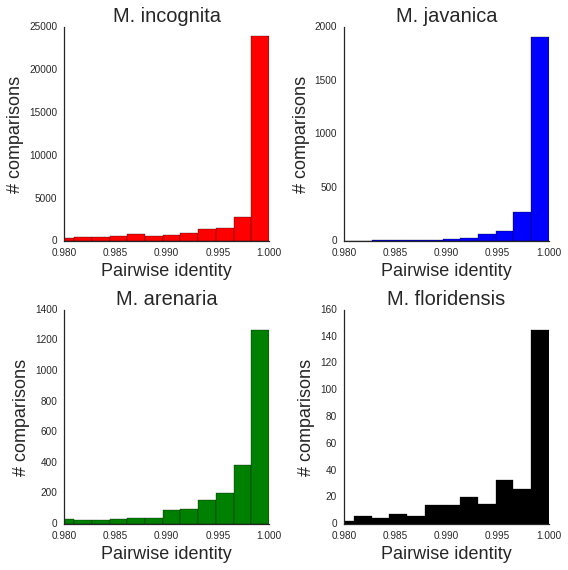

In [84]:
from scipy import histogram

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

inds = [0,0,0,1,1,0,1,1]

species = ['Minc', 'Mjav', 'Mare', 'Mflo']

colors = ['r','b','g','black']

bins = []

for s in species:
    ax = axes[inds.pop(0)][inds.pop(0)]
    c = colors.pop(0)
    subdf = df.loc[df['Comparison'] == '%s %s'%(s,s)]
    subdf = subdf.loc[subdf['Genome'] == 'nuclear']
    d = subdf['Identity']
    from numpy import median
    print s, median(d)
    
    if  len(bins) == 0:
        bins = histogram(d,bins=100)[1]
        
    
    sns.distplot(d, color=c, bins=bins, ax=ax, hist_kws={'alpha': 1}, kde=False)
    #subdf = df.loc[df['Comparison'] == '%s %s'%(s,s)]
    #subdf = subdf.loc[subdf['Genome'] == 'mitochondrial']
    #d = subdf['Identity']
    #sns.distplot(d, color='purple', ax=ax, kde=False)
    ax.set_xlim(0.98,1)
    sns.despine(ax=ax)
    ax.set_xlabel('Pairwise identity', fontsize=18)
    ax.set_ylabel('# comparisons', fontsize=18)
    titles = {
        'Minc': 'M. incognita', 
        'Mjav': 'M. javanica',
        'Mare': 'M. arenaria', 
        'Mflo': 'M. floridensis'
    }
    ax.set_title(titles[s], fontsize=20)
plt.tight_layout()
plt.savefig('seq_dist1.png')

In [39]:
import glob
from Bio import SeqIO

pat = "./mitochondrial_assemblies/phylogenetic_analysis/*_trimmed_aln.fasta"
GC = {}
for f in glob.glob(pat):
    records = list(SeqIO.parse(f,'fasta'))
    records = sorted(records, key=lambda x: x.id)
    for i in records:
        species = sp[i.id]
        gc = str(i.seq).count('c') + str(i.seq).count('C') + str(i.seq).count('g') + str(i.seq).count('G')
        length  = len(str(i.seq).replace('-',''))
        try:
            GC[species]['gc'] += gc
            GC[species]['len'] += length
        except:
            GC[species] = {'gc': gc, 'len': length}
                
for s in GC:
    
    print s, GC[s]['gc']/float(GC[s]['len'])
    

Mjav 0.16204015576
Mare 0.162930810204
Mflo 0.162960985078
Ment 0.166081822193
Minc 0.16326782156
Mhap 0.169039391845
